In [130]:
from matplotlib import pyplot as plt
import random

#---------------------------------------------
# Execute the simulation of 1 Monty Hall Problem (MHP) with N doors, K of which are opened
# The simulation is excuted for 3 type of players:

# Player 0: Conservative
# Player 1: Switcher
# Player 2: Newcomer

# Returns a list of ordered boolean values representing the winners of the simulation
# 1 <= K <= N-2 and N >= 3
def perform_show(N, K): 
    # List of the initially available doors for each player
    # Doors are numbered starting from 0 up to N-1
    available_doors = [list(range(N)) for n in range(3)] # [[0, 1, 2, ... , N-1], [], []]

    # Generate the winning door, for every player
    winning_doors = [random.randint(0, N-1) for n in range(3)] # [wd_0, wd_1, wd_2]

    # We have to simulate this for each player separately,
    # therefore perform_show() actually runs the expriment 3 times

    # Generate the choice of each player (in their own simulations)
    # Player 2 (index 2) will be overwritten
    players_choices = [random.randint(0, N-1) for n in range(3)] # [pc_0, pc_1, pc_2]

    #-------------------------------------------------------------------------------
    # The doors availabe to be opened should be those that
    # haven't been choosen and are not the winning ones
    doors_available_to_be_opened = [list(range(N)) for n in range(3)] # Like available_doors
    for i in range(2):
        doors_available_to_be_opened[i].remove(players_choices[i])
        # The Following "if" statement is just to handle the case when the winning door
        # coincides with the choosen one, which would throw an exception
        if winning_doors[i] in doors_available_to_be_opened[i]:
            doors_available_to_be_opened[i].remove(winning_doors[i])
    
    # Since the Newcomer (player 2) choose after the opening, from his set of doors
    # we should remove just the winning door
    doors_available_to_be_opened[2].remove(winning_doors[2])

    # Generate the opened doors, for every player (always separately),
    # sampling from the doors_available_to_be_opened
    opened_doors = [random.sample(doors_available_to_be_opened[i], K)
                    for i in range(3)] # [[od_0, od_1, od_2, ... , od_(K-1)], [], []]
    
    # We don't need the doors_available_to_be_opened list anymore
    del doors_available_to_be_opened
    
    #------------------------------------------------------------------------------------
    # From the available doors for the i-th player, remove the doors that have been opened
    for i in range (3):
        for j in range(K):
            available_doors[i].remove(opened_doors[i][j]) # [[0, 1, 2, ... , N-K-1], [], []]
    
    # From the available doors of the Switcher (player 2) remove his first choice
    available_doors[1].remove(players_choices[1])

    #-----------------------------------------------------------------------------
    # Newcomer (player 2) makes his choice
    # His choice his among one of the availabe doors to him, which are N-K
    # Therefore he can choose one door from the 0-th to the (N-K-1)-th
    players_choices[2] = available_doors[2][random.randint(0, N-K-1)]

    # Switcher (player 1) switches door
    # The number of available doors for him his N-K-1
    # because we have to discard his first choice
    # Therefore he can choose one door from the 0-th to the (N-K-2)-th
    players_choices[1] = available_doors[1][random.randint(0, N-K-2)]

    #------------------------------------------------------------------------
    # Boolean list where we store the winners of the simulation                                 
    winners = []

    # If player i-th got the right door in his simulation (the i-th simulation)
    # then append True to our growing list
    # else append False
    for i in range(len(players_choices)):
        if players_choices[i] == winning_doors[i]:
            winners.append(True)
        else:
            winners.append(False)

    return winners # [Bool, Bool, Bool]

#--------------------------------------------------------------
# Returns the expected probability of success for the specified type of player
def winning_probability(N, K, pl_type="s"):
    prob = 0
    if (pl_type.lower() == "conservative") or (pl_type.lower() == "c"):
        prob = 1 / N
    elif (pl_type.lower() == "switcher") or (pl_type.lower() == "s"):
        prob = (1 / N) * (N - 1) / (N - K - 1)
    elif (pl_type.lower() == "newcomer") or (pl_type.lower() == "n"):
        prob = 1 / (N - K)
    return prob
    

In [131]:
# Variables to set the parameters of the simulation
doors_number = 3 # N, minimum value is 3
opened_doors_number = 1 # K, minimum value is 1, maximum value is N-2
simulations_number = 2524 # Number of simulations to be executed

# A list of 3 numbers to count the wins of every type of player
players_win_count = [0, 0, 0]

# This will store the outcome of every simulation
winners = [] # [[Bool, Bool, Bool], [], [], ...]

# Store the result of every simulation
for i in range(simulations_number):
    winners.append(perform_show(doors_number, opened_doors_number))
    # Sum the wins of every type of player in each simulation
    for j in range(len(winners[i])):
        if winners[i][j] == True:
            players_win_count[j] += 1

# Print the number of wins of every type of player
print("Victories of every type of player: " + str(players_win_count))

Victories of every type of player: [887, 1685, 1266]


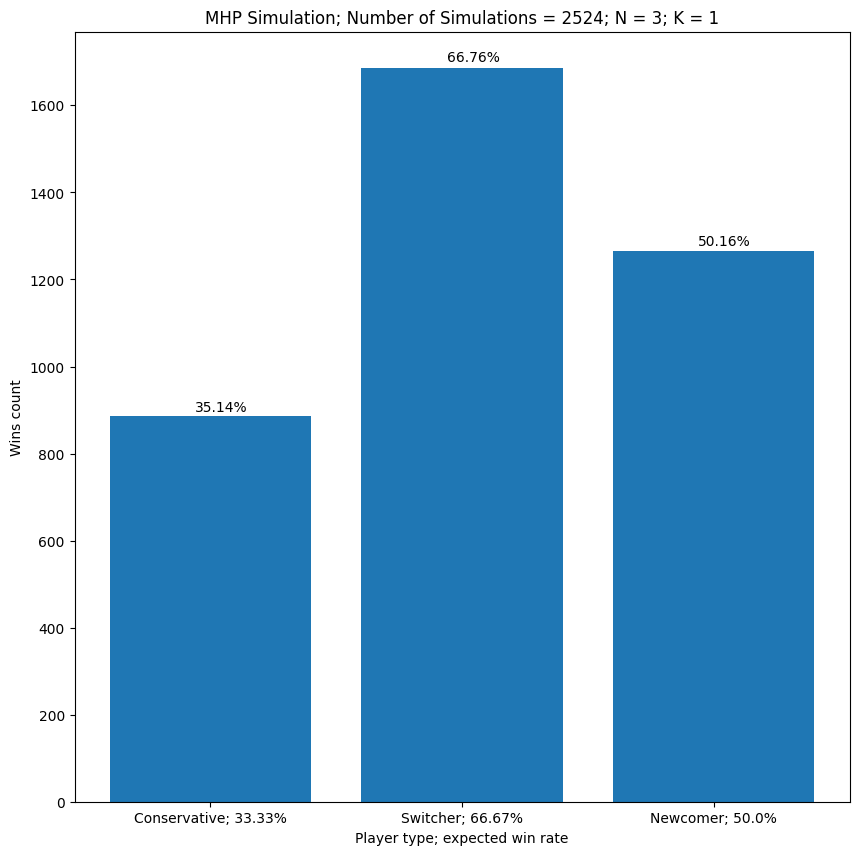

In [132]:
# List containing the name of every type of player
# Will be used to name the bars in the (bar)plot
players_bins = ["Conservative", "Switcher", "Newcomer"]

# Attach the expected win rate to the name of the bars
for p_t in players_bins:
    players_bins[players_bins.index(p_t)] += "; " + str(
        round(
            winning_probability(
                doors_number, opened_doors_number, p_t) * 100, 2)) + "%"

#----------------------------------------------------------------------------------
# Plot of the results
fig, ax = plt.subplots(figsize =(10, 10))
ax.bar(players_bins, players_win_count)
ax.set_title("MHP Simulation; Number of Simulations = " + str(
    simulations_number) + "; N = " + str(doors_number) + "; K = " + str(opened_doors_number))
ax.set_xlabel("Player type; expected win rate")
ax.set_ylabel("Wins count")

# Adding labels for winning rates
for i in ax.patches:
    text = str(round((i.get_height()/simulations_number)*100, 2)) + "%"
    plt.text(i.get_x()+i.get_width()/2*(1-2/13), i.get_height()*(1+0.01), text)

plt.show()